# Exercise 1
https://github.com/AutoGIS-2017/Exercise-1

In [1]:
from shapely.geometry import Point, LineString, Polygon
import pandas as pd

### Problem 1:  Creating basic geometries

1.1 Create a function called createPointGeom() that has two parameters (x_coord, y_coord). Function should create a shapely Point geometry object and return that. Demonstrate the usage of the function by creating Point -objects with the function.

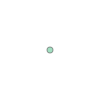

In [2]:
def createPointGeom(x, y):
    return(Point(x,y))
examplePoint = createPointGeom(1,2)
examplePoint

1.2 Create a function called createLineGeom() that takes a list of Shapely Point objects as parameter and returns a LineString object of those input points. Function should first check that the input list really contains Shapely Point(s). Demonstrate the usage of the function by creating LineString -objects with the function.

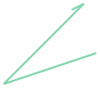

In [3]:
def createLineGeom(points):
    return(LineString(points))
examplePointList = [Point(1,2), Point(3,3), Point(-10,-10), Point(5,-5)]
exampleLineString = createLineGeom(examplePointList)
exampleLineString

1.3 Create a function called createPolyGeom() that takes a list of coordinate tuples OR a list of Shapely Point objects and creates/returns a Polygon object of the input data. Both ways of passing the data to the function should be working. Demonstrate the usage of the function by passing data first with coordinate-tuples and then with Point -objects.

In [4]:
def createPolyGeom(pointsObject):
    if isinstance(pointsObject[0], Point):
        pointsList = [(point.x, point.y) for point in pointsObject]
    else:
        pointsList = pointsObject
    return(Polygon(pointsList))    

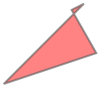

In [5]:
# Test if it works for a list of points
examplePolygonWithPoints = createPolyGeom(examplePointList)
examplePolygonWithPoints

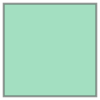

In [6]:
# Test if it works for a list of coordinates
exampleListOfCoordinates = [(0,0), (0,10), (10,10), (10,0)]
examplePolygonWithCoords = createPolyGeom(exampleListOfCoordinates)
examplePolygonWithCoords

### Promlem 2: Attributes of geometries

2.1 Create a function called getCentroid() that takes any kind of Shapely's geometric -object as input and returns a centroid of that geometry. Demonstrate the usage of the function.

In [7]:
def getCentroid(geometryObject):
    return(geometryObject.centroid)
print('getCentroid(examplePoint): ', getCentroid(examplePoint))
print('getCentroid(exampleLineString): ', getCentroid(exampleLineString))
print('getCentroid(examplePolygonWithPoints): ', getCentroid(examplePolygonWithPoints))

getCentroid(examplePoint):  POINT (1 2)
getCentroid(exampleLineString):  POINT (-2.72843701361772 -4.867721432288817)
getCentroid(examplePolygonWithPoints):  POINT (-1.255952380952381 -4.642857142857143)


2.2 Create a function called getArea() that takes a Shapely's Polygon -object as input and returns the area of that geometry. Demonstrate the usage of the function.

In [8]:
def getArea(geometryObject):
    return(geometryObject.area)
print('--- points and lines SHOULDNT have an area ---')
print('getArea(examplePoint): ', getArea(examplePoint))
print('getArea(exampleLineString): ', getArea(exampleLineString))
print('--- Polygons SHOULD have an area ---')
print('getArea(examplePolygonWithPoints): ', getArea(examplePolygonWithPoints))

--- points and lines SHOULDNT have an area ---
getArea(examplePoint):  0.0
getArea(exampleLineString):  0.0
--- Polygons SHOULD have an area ---
getArea(examplePolygonWithPoints):  56.0


2.3 Create a function called getLength() takes either a Shapely's LineString or Polygon -object as input. Function should check the type of the input and returns the length of the line if input is LineString and length of the exterior ring if input is Polygon. If something else is passed to the function, it should tell the user --> "Error: LineString or Polygon geometries required!". Demonstrate the usage of the function.

In [9]:
def getLength(geometryObject):
    if isinstance(geometryObject, (LineString, Polygon)):
        return(geometryObject.length)
    else:
        return("Error: LineString or Polygon geometries required!")
print('getLength(examplePoint): ', getLength(examplePoint))
print('getLength(exampleLineString): ', getLength(exampleLineString))
print('getLength(examplePolygonWithPoints): ', getLength(examplePolygonWithPoints))

getLength(examplePoint):  Error: LineString or Polygon geometries required!
getLength(exampleLineString):  36.43223258919192
getLength(examplePolygonWithPoints):  44.49449033749047


### Problem 3: Reading coordinates from a file and creating a geometries

One of the "classical" problems in GIS is the situation where you have a set of coordinates in a file and you need to get them into a map (or into a GIS-software). Python is a really handy
tool to solve this problem as with Python it is basically possible to read data from any kind of input datafile (such as csv-, txt-, excel-, or gpx-files (gps data) or from different databases). 
So far, I haven't faced any kind of data or file that would be impossible to read with Python. 

Thus, let's see how we can read data from a file and create Point -objects from them that can be saved e.g. as a new Shapefile (we will learn this next week). 
Our dataset **[travelTimes_2015_Helsinki.txt](data/travelTimes_2015_Helsinki.txt)** consist of 
travel times between specific locations in Helsinki Region. The first four rows of our data looks like this:

```
   from_id;to_id;fromid_toid;route_number;at;from_x;from_y;to_x;to_y;total_route_time;route_time;route_distance;route_total_lines
   5861326;5785640;5861326_5785640;1;08:10;24.9704379;60.3119173;24.8560344;60.399940599999994;125.0;99.0;22917.6;2.0
   5861326;5785641;5861326_5785641;1;08:10;24.9704379;60.3119173;24.8605682;60.4000135;123.0;102.0;23123.5;2.0
   5861326;5785642;5861326_5785642;1;08:10;24.9704379;60.3119173;24.865102;60.4000863;125.0;103.0;23241.3;2.0
```

Thus, we have many columns of data, but the few important ones are:

| Column | Description |
|--------|-------------|
| from_x | x-coordinate of the **origin** location (longitude) |
| from_y | y-coordinate of the **origin** location (latitude) |
| to_x   | x-coordinate of the **destination** location (longitude)|
| to_y   | y-coordinate of the **destination** location (latitude) |
| total_route_time | Travel time with public transportation at the route |

### Tasks

1. Save the [travelTimes_2015_Helsinki.txt](data/travelTimes_2015_Helsinki.txt) into your computer.
2. Read 4 columns, i.e. 'from_x', 'from_y', 'to_x', 'to_y' from the data into Python using Pandas.
3. Create two lists called `orig_points` and `dest_points`
4. Iterate over the rows of your DataFrame and add Shapely Point -objects into the orig_points -list and dest_point -list representing the origin 
locations and destination locations accordingly.

In [10]:
helsinkiData = pd.read_csv('./travelTimes_2015_Helsinki.txt', sep=';', usecols=['from_x', 'from_y', 'to_x', 'to_y'])
helsinkiData.head()

,from_x,from_y,to_x,to_y
0,24.970438,60.311917,24.856034,60.399941
1,24.970438,60.311917,24.860568,60.400014
2,24.970438,60.311917,24.865102,60.400086
3,24.970438,60.311917,24.869636,60.400159
4,24.970438,60.311917,24.842582,60.397478


In [11]:
orig_x = helsinkiData['from_x'].tolist()
orig_y = helsinkiData['from_y'].tolist()
orig_points = [Point(x, y) for x,y in zip(orig_x, orig_y)]
print(orig_points[0:2])

[<shapely.geometry.point.Point object at 0x7f8709f9feb8>, <shapely.geometry.point.Point object at 0x7f86b844f358>]


In [12]:
def getFromPoint(row):
    return(Point(row['from_x'], row['from_y']))
helsinkiData['from_point'] = helsinkiData.apply (getFromPoint, axis=1)

def getToPoint(row):
    return(Point(row['to_x'], row['to_y']))
helsinkiData['to_point'] = helsinkiData.apply (getToPoint, axis=1)

In [13]:
helsinkiData.head()

,from_x,from_y,to_x,to_y,from_point,to_point
0,24.970438,60.311917,24.856034,60.399941,POINT (24.9704379 60.3119173),POINT (24.8560344 60.3999406)
1,24.970438,60.311917,24.860568,60.400014,POINT (24.9704379 60.3119173),POINT (24.8605682 60.4000135)
2,24.970438,60.311917,24.865102,60.400086,POINT (24.9704379 60.3119173),POINT (24.865102 60.4000863)
3,24.970438,60.311917,24.869636,60.400159,POINT (24.9704379 60.3119173),POINT (24.8696358 60.4001589)
4,24.970438,60.311917,24.842582,60.397478,POINT (24.9704379 60.3119173),POINT (24.8425817 60.39747779999999)


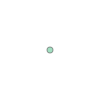

In [16]:
# confirm that it is actually a point
helsinkiData['from_point'].tolist()[0]